# Testing Linear Regression and MLP Models for Car Sale Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import where

import tensorflow as tf
from sklearn import preprocessing
import statsmodels.formula.api as smf

# Linear Regression/MLP functions 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from math import sqrt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
import seaborn as sns
# Custom functions
from cars_funct import *
from Assignment1_MLP import MLP_function


### Read in full excel dataset

In [2]:
data_OG = pd.read_excel("Cars_Data_full.xlsx")
data= data_OG.copy()
data.head()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
0,21000,26,31463,Petrol,195,0,Silver,0,1800,3,...,1,0,1,1,1,1,0,0,1,0
1,20000,23,43612,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
2,19650,26,32191,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
3,21550,32,23002,Petrol,195,1,Black,0,1800,3,...,1,1,1,1,1,1,0,1,1,0
4,22550,33,34133,Petrol,195,1,Grey,0,1800,3,...,1,1,1,1,1,1,0,1,1,0


### Data Preparation

In [3]:
# Create dummy variabless for Fuel and Color
data = pd.get_dummies(data, columns=['Fuel'])
data= pd.get_dummies(data, columns=['Color'])
data.head()

,Price,Age,KM,HP,MC,Auto,CC,Drs,Cyl,Grs,...,Fuel_Diesel,Fuel_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_White,Color_Yellow
0,21000,26,31463,195,0,0,1800,3,3,6,...,0,1,0,0,0,0,0,1,0,0
1,20000,23,43612,195,0,0,1800,3,3,6,...,0,1,0,0,0,0,1,0,0,0
2,19650,26,32191,195,0,0,1800,3,3,6,...,0,1,0,0,0,0,1,0,0,0
3,21550,32,23002,195,1,0,1800,3,3,6,...,0,1,1,0,0,0,0,0,0,0
4,22550,33,34133,195,1,0,1800,3,3,6,...,0,1,0,0,0,1,0,0,0,0


In [4]:
# Remove column Cyl and Drs because it is the same value throughout 
del data['Cyl']
# data.head()

In [5]:
data = normalize(data)
data.head()

,Price,Age,KM,HP,MC,Auto,CC,Drs,Grs,Wght,...,Fuel_Diesel,Fuel_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_White,Color_Yellow
0,21000,0.276316,0.135057,1.0,0.0,0.0,0.034014,0.333333,1.0,0.300813,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20000,0.236842,0.187212,1.0,0.0,0.0,0.034014,0.333333,1.0,0.300813,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,19650,0.276316,0.138182,1.0,0.0,0.0,0.034014,0.333333,1.0,0.300813,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21550,0.355263,0.098734,1.0,1.0,0.0,0.034014,0.333333,1.0,0.300813,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22550,0.368421,0.146519,1.0,1.0,0.0,0.034014,0.333333,1.0,0.300813,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Correlation Analysis: Feature to Feature & Feature to Target Var

In [6]:
# find the correlation between just the indep variables
# list variables with correlation > 0.5
indepvars = data.copy()
del indepvars['Price']
highcorr(indepvars, 0.5)

{'Abag_2', 'Fuel_Petrol', 'CD', 'Fuel_Diesel', 'PStr', 'KM', 'Pwin', 'Comp'}


In [7]:
# check the correlation of these variables with the target variable Price 
corr_matrix = data.corr()
corr_matrix = abs(corr_matrix)
print(corr_matrix["Price"].sort_values(ascending=False))

Price           1.000000
Age             0.874000
AC              0.594625
Comp            0.592932
Wght            0.582299
KM              0.563606
CD              0.477470
Pwin            0.357218
Clock           0.343373
HP              0.329473
ABS             0.296484
Abag_2          0.245055
Drs             0.180036
Color_Grey      0.168671
Tow_Bar         0.163694
SpM             0.161420
CC              0.126397
M_Rim           0.109854
MC              0.106944
Color_Green     0.102950
Color_Red       0.102716
Color_White     0.100616
Abag_1          0.089588
Grs             0.071676
PStr            0.062295
Auto            0.044148
Fuel_Petrol     0.041046
Fuel_Diesel     0.041046
Color_Silver    0.038567
Radio           0.038563
Color_Black     0.033527
Mfr_G           0.031724
Color_Yellow    0.025057
G_P             0.013776
Color_Blue      0.000383
Name: Price, dtype: float64


In [9]:
# Pwin, Fuel_Petrol, Abag_2, Fuel_Diesel, PStr have an abs correlation < 0.5 with Price therefore REMOVE 

# check the correlation of KM and Comp with other features
print('KM Correlation') 
print(corr_matrix["KM"].sort_values(ascending=False))
print('Comp Correlation') 
print(corr_matrix["Comp"].sort_values(ascending=False))

# KM has an abs correlation with Price > 0.5 therefore KEEP
# Comp has an abs correlation with Price > 0.5 BUT it has high correlation with Age which is more correlated with Price 
# REMOVE Comp


KM              1.000000
Price           0.563606
Age             0.509142
Fuel_Petrol     0.435096
Fuel_Diesel     0.435096
HP              0.355217
Comp            0.355179
CD              0.268766
AC              0.255845
ABS             0.173041
Pwin            0.153698
Abag_2          0.143854
Clock           0.122951
Color_White     0.107711
Color_Grey      0.106942
CC              0.103990
Auto            0.084443
MC              0.078828
Tow_Bar         0.075148
Color_Red       0.047572
Color_Yellow    0.039785
Color_Black     0.036256
SpM             0.033646
G_P             0.028035
M_Rim           0.027732
Wght            0.027320
Color_Green     0.017291
Color_Blue      0.009402
Color_Silver    0.007342
PStr            0.005000
Abag_1          0.003258
Radio           0.001781
Grs             0.000646
Mfr_G           0.000234
Name: KM, dtype: float64


In [8]:
# delete features that are uncorrelated with Price
# 0.5 is used as the minimum correlation
data_new = del_lowcorr(data,0.5)
# all unwanted features were removed except for Comp 
del data_new['Comp']
# test performance of both models with and without KM
# del data_new['KM']
data_new.head()

,Price,Age,KM,Wght,AC
0,21000,0.276316,0.135057,0.300813,1.0
1,20000,0.236842,0.187212,0.300813,1.0
2,19650,0.276316,0.138182,0.300813,1.0
3,21550,0.355263,0.098734,0.300813,1.0
4,22550,0.368421,0.146519,0.300813,1.0


In [14]:
# #verfiy no data loss
# print('Rows - original data set',len(data_OG))
# print('Rows - new data set',len(data_new))
# print('Cols- original data set',len(data_OG.columns))
# print('Cols - new data set',len(data_new.columns))

In [63]:
#FINDING P_Value
model = smf.ols('Price ~ KM', data=data_new).fit()
print(model.pvalues)

Intercept     0.000000e+00
KM           1.957145e-115
dtype: float64


### Split the Data

In [55]:
print(model.pvalues)

Intercept                        3.545316e-28
C(KM)[T.0.006435161136606579]    2.172779e-05
C(KM)[T.0.017167584646624223]    3.047303e-05
C(KM)[T.0.02146055405063128]     2.663627e-01
C(KM)[T.0.022653999544945243]    2.125512e-01
                                     ...     
C(KM)[T.0.8800544348520428]      3.274115e-03
C(KM)[T.0.9272770982961205]      2.132927e-03
C(KM)[T.0.9348498963247889]      1.303134e-03
C(KM)[T.0.9363696074938074]      3.274115e-03
C(KM)[T.1.0]                     1.178399e-03
Length: 1208, dtype: float64


In [64]:
# separate features from target variable  
X = data_new.iloc[:, 1:5].values
y = data_new.iloc[:, 0].values
# test and training sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

num_rows, k = X.shape
n = len(y_test)

### Build Linear Regression Model

In [65]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
pred_LR = regr.predict(X_test)

# Print The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_test, pred_LR))

### Evaluate Linear Regression Model

In [66]:
# Evaluating Model
print('SSE: %.2f'
      % sum((y_test-pred_LR)**2))    
R2_LR = r2_score(y_test, pred_LR)
print('R squared: %.3f'
      % R2_LR)

AR2_LR = 1-((1-R2_LR)*(n-1)/(n-k-1))
print('Adjusted R squared : %.3f' % AR2_LR)


SSE: 457279368.41
R squared: 0.872
Adjusted R squared : 0.870


[Text(0.5, 1.0, 'Error Plot - Linear Regression'), Text(0.5, 0, 'Error')]

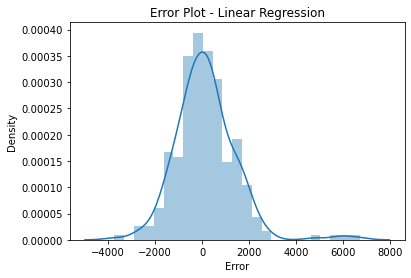

In [67]:
# Check to see if the error probabiliy distribution is normal
residual = y_test - pred_LR
sns.distplot(residual).set(title='Error Plot - Linear Regression', xlabel= 'Error')


### Build MLP model

In [24]:
# Normalize features for MLP 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# build model and set parameters(neurons and # layers)
input_layer = Input(shape=(X.shape[1],))

# Test both 1 and 2 hidden layers 
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(100, activation='relu')(dense_layer_1)
output = Dense(1)(dense_layer_2)
# output = Dense(1)(dense_layer_1)


model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

### Evaluate MLP model

In [33]:
# train model (change # epochs)
history = model.fit(X_train, y_train, batch_size=2, epochs=500, verbose=1, validation_split=0.2)

===================] - 1s 2ms/step - loss: 1230923.8750 - mean_squared_error: 1230923.8750 - val_loss: 1460558.5000 - val_mean_squared_error: 1460558.5000
Epoch 396/500
437/437 [==============================] - 1s 3ms/step - loss: 1240467.1250 - mean_squared_error: 1240467.1250 - val_loss: 1403704.3750 - val_mean_squared_error: 1403704.3750
Epoch 397/500
437/437 [==============================] - 1s 3ms/step - loss: 1242996.3750 - mean_squared_error: 1242996.3750 - val_loss: 1398868.0000 - val_mean_squared_error: 1398868.0000
Epoch 398/500
437/437 [==============================] - 1s 2ms/step - loss: 1241679.1250 - mean_squared_error: 1241679.1250 - val_loss: 1385371.8750 - val_mean_squared_error: 1385371.8750
Epoch 399/500
437/437 [==============================] - 1s 2ms/step - loss: 1239995.3750 - mean_squared_error: 1239995.3750 - val_loss: 1390328.8750 - val_mean_squared_error: 1390328.8750
Epoch 400/500
437/437 [==============================] - 1s 2ms/step - loss: 1227531.2500

### Test different Parameter Combinations

In [34]:
pred_MLP = model.predict(X_test)
select_pred_MLP= pred_MLP[:,0]

# print('MSE:\n',mean_squared_error(y_test,select_pred_MLP))
SSE = sum((y_test-select_pred_MLP)**2)
print('SSE :',SSE)   
R2_MLP = r2_score(y_test, select_pred_MLP)
print('R squared: %.3f'
      % R2_MLP)
AR2_MLP = R2_MLP -((k-1)*(1-R2_MLP)/(n-k)) 
print('Adjusted R squared : %.3f' % AR2_MLP)


SSE : 298876311.2510395
R squared: 0.905
Adjusted R squared : 0.904


In [40]:
# to change parameters easily, use the MLP_function 
# MLP_function(X,X_train,X_test,y_train,y_test,num_neuron,bsize,num_epoch,val)

MLP_function(X,X_train,X_test,y_train,y_test,70,2,500,0.2)
# MLP_function(X,X_train,X_test,y_train,y_test,80,2,500,0.2)
# MLP_function(X,X_train,X_test,y_train,y_test,100,2,500,0.2)

1472996.5000 - val_loss: 1619189.5000 - val_mean_squared_error: 1619189.5000
Epoch 396/500
437/437 [==============================] - 1s 2ms/step - loss: 1472122.6250 - mean_squared_error: 1472122.6250 - val_loss: 1620311.5000 - val_mean_squared_error: 1620311.5000
Epoch 397/500
437/437 [==============================] - 1s 2ms/step - loss: 1472136.0000 - mean_squared_error: 1472136.0000 - val_loss: 1618367.0000 - val_mean_squared_error: 1618367.0000
Epoch 398/500
437/437 [==============================] - 1s 1ms/step - loss: 1471475.0000 - mean_squared_error: 1471475.0000 - val_loss: 1617487.2500 - val_mean_squared_error: 1617487.2500
Epoch 399/500
437/437 [==============================] - 1s 2ms/step - loss: 1472351.3750 - mean_squared_error: 1472351.3750 - val_loss: 1615450.7500 - val_mean_squared_error: 1615450.7500
Epoch 400/500
437/437 [==============================] - 1s 1ms/step - loss: 1472678.1250 - mean_squared_error: 1472678.1250 - val_loss: 1615369.5000 - val_mean_square